<a href="https://colab.research.google.com/github/bartoszpankratz/VAR_neural_network/blob/master/VAR_Snippet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#only when arch package is not installed
!pip install arch

     |████████████████████████████████| 798kB 2.7MB/s 


In [2]:
URL = "https://drive.google.com/uc?id=1DXeshkrjXCYy6TIK6HssYOZbyy6XUmDP"
DATA_SCRIPT = "https://raw.githubusercontent.com/bartoszpankratz/VAR_neural_network/master/data.py"
VAR_SCRIPT = "https://raw.githubusercontent.com/bartoszpankratz/VAR_neural_network/master/VAR.py"

In [3]:
import requests, zipfile, io

In [5]:
import urllib.request 
urllib.request.urlretrieve(DATA_SCRIPT, "Data.py")
import Data as data
urllib.request.urlretrieve(VAR_SCRIPT, "VAR.py")
import VAR as VAR

In [6]:
import matplotlib.pyplot as plt

In [7]:
alpha= [0.01, 0.05]
look_back = 250
train_period = 0.5

In [8]:
r = requests.get(URL)
zf = zipfile.ZipFile(io.BytesIO(r.content))

In [9]:
dt = data.sim_data("GARCH",1000)

In [10]:
var = VAR.VaR(dt, ["VCA", "HIST"], alpha, look_back)

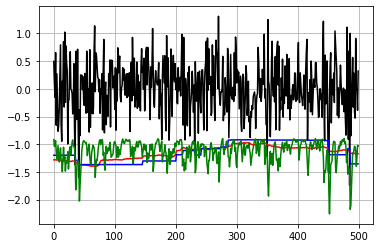

In [14]:
NOBS = 500
plt.plot(var.vars['Returns'].values[-NOBS:], color = 'black')
plt.plot(var.vars['VCA_0.01'].values[-NOBS:], color = 'red')
plt.plot(var.vars['HIST_0.01'].values[-NOBS:], color = 'blue')
try:
    plt.plot(var.vars['True_VAR_0.01'].values[-NOBS:], color = 'green')
except:
    pass
plt.grid()
plt.show()